<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Bureau d'études : Modélisation Statistique</div>

In [215]:
import copy
import pandas
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from math import sqrt
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, LeaveOneOut

# LECTURE, EXTRACTION ET VISUALISATION DES DONNEES

In [216]:
dataframe=pandas.read_csv("./MedicalData1.csv",sep=';',decimal=b',')
dataframe.head()

,Acid 1 density,Acid 2 density,Acid 3 density,Cells 1 density,Cells 2 density,Pressure 1,Pressure 2,Bio-marker 1,Bio-marker 2,Biomarker 3,Biomarker 4,Biomarker 5,Biomarker 6,Biomarker 6.1,Biomarker 7,Biomarker 8,Biomarker 9,Biomarker 10,Disease progression
0,11.6,6.4,4.3,7.2,14.4,19.26,39.32,50.00,13.040000,0.20,0.0440,-1.578984,2.209,9.02,0.26,94.285053,3.56,16.91,6
1,15.5,10.5,4.9,6.9,13.7,8.57,36.78,22.57,18.713333,0.51,0.8501,-2.497499,0.339,22.43,0.10,86.766527,7.06,-3.47,6
2,15.3,6.5,4.2,6.4,13.6,13.48,25.90,8.25,8.246667,0.27,0.9629,-3.638758,0.339,17.94,0.13,107.336147,3.20,10.05,10
3,13.4,7.7,4.1,5.8,14.2,15.23,44.36,11.09,11.093333,0.67,-0.2756,-6.273760,1.611,11.38,0.20,136.516384,4.33,-3.62,18
4,16.0,5.2,3.2,5.7,12.8,8.37,19.62,7.44,6.386667,0.24,-0.6928,-2.096575,0.659,8.56,0.27,88.774469,4.57,1.56,7


In [217]:
listColNames=list(dataframe.columns)

XY=dataframe.values
ColNb_Y=listColNames.index('Disease progression')

#to make it contains the column names of X only
listColNames.pop(ColNb_Y)

#reshape is to make sure that Y is a column vector
Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   
X = np.delete(XY, ColNb_Y, 1)

X_scaled = preprocessing.scale(X)

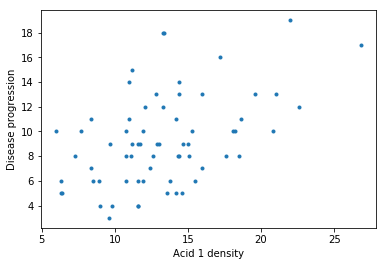

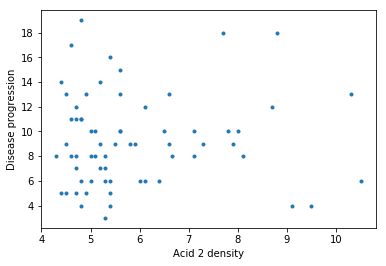

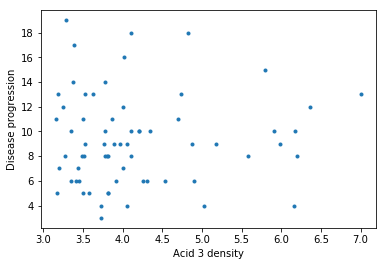

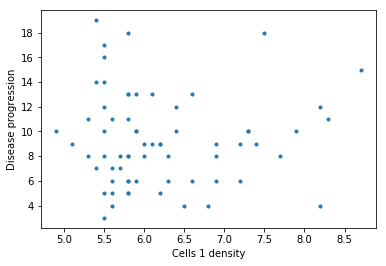

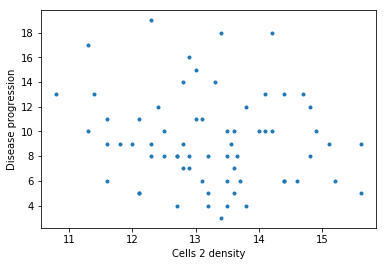

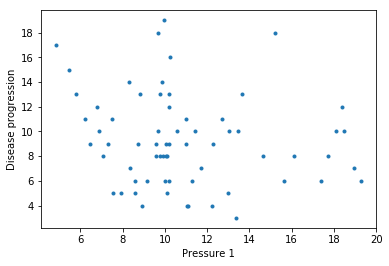

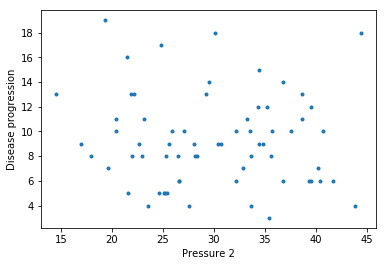

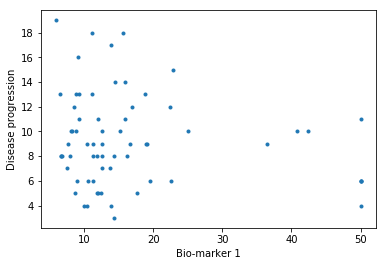

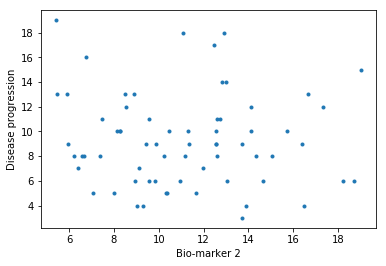

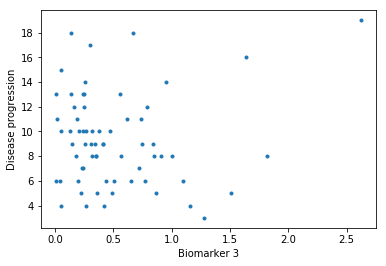

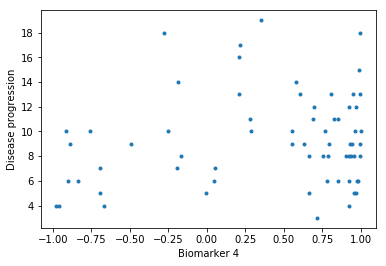

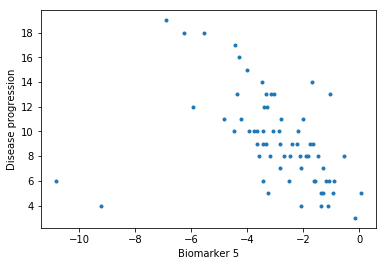

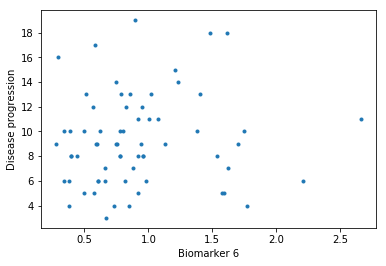

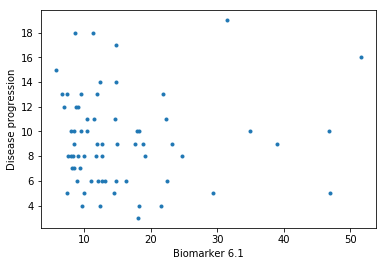

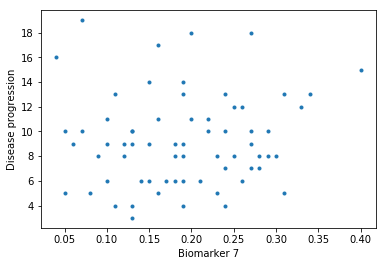

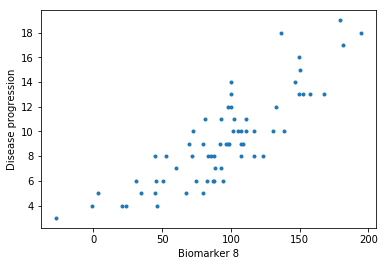

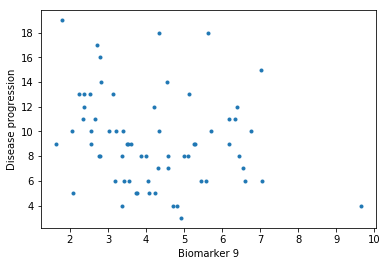

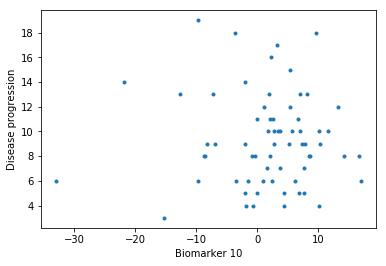

In [218]:
for Col in range(len(listColNames)):
    plt.plot(X[:,Col],Y[:],'.')
    plt.xlabel(listColNames[Col])
    plt.ylabel('Disease progression')
    plt.show()

# QUESTIONS

## QUESTION 1 
Observez les donnees unes par unes. Est-ce que vous identifiez visuellement des liens entre certaines variables et la variable 'Disease progression'. Si oui, lesquels ?

    Visuellement (en observant la dispersion des points), on identifie une corrélation entre 'Disease progression' et :
    - Biomarker 8 : la corrélation semble positive
    - Acid 1 density : la corrélation qui semble positive est légèrement moins évidente
    - Biomarker 5 : elle semble cette fois-ci négative

Text(0,0.5,'Disease progression')

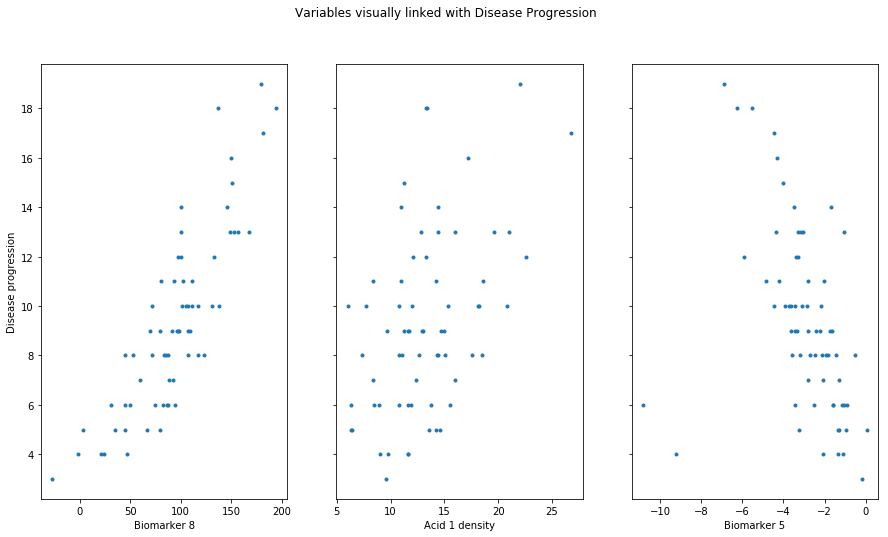

In [219]:
f, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15,8))
f.suptitle("Variables visually linked with Disease Progression")

Col0=listColNames.index("Acid 1 density")
ax[1].plot(X[:,Col0],Y[:],'.')
ax[1].set_xlabel(listColNames[Col0])

Col1=listColNames.index("Biomarker 5")
ax[2].plot(X[:,Col1],Y[:],'.')
ax[2].set_xlabel(listColNames[Col1])

Col2=listColNames.index("Biomarker 8")
ax[0].plot(X[:,Col2],Y[:],'.')
ax[0].set_xlabel(listColNames[Col2])
ax[0].set_ylabel('Disease progression')

## QUESTION 2 
On se demande si il est possible de predire le niveau de 'Disease progression' à partir de                de la variable 'Acid 1 density'. 

### QUESTION 2.1 
Effectuez une regression lineaire simple entre ces deux variables et predisez ensuite les valeurs de 'Disease progression' a l'aide de 'Acid 1 density'. Vous pourrez evaluer la qualité des predictions a l'aide du coefficient de determination R2.

In [220]:
ColNb_X1 = listColNames.index('Acid 1 density')

X1 = XY[:,ColNb_X1]

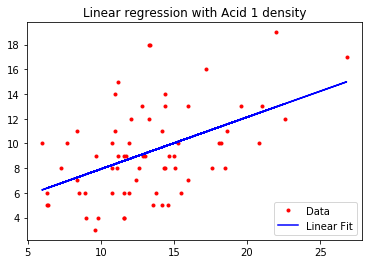

In [221]:
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(X1[:, np.newaxis], Y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# Y prédit avec la régression linéaire simple
Y_pred = lr.predict(X1[:, np.newaxis]) 

# representation du resultat
fig = plt.figure()
plt.plot(X1, Y, 'r.')
plt.plot(X1, Y_pred, 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression with Acid 1 density')
plt.show()

In [222]:
print("Y = " + str(lr.intercept_[0]) + ' + ' + str(lr.coef_[0,0]) + '*X')

print("R² = ", lr.score(X1[:, np.newaxis], Y))
print("R² = ", r2_score(Y, Y_pred))

Y = 3.7186254486308306 + 0.42034504018567687*X
R² =  0.2275627359715969
R² =  0.22756273597159693


    R² n'est pas proche de 0 : la prédiction semble corrélée avec la réalité, mais la qualité pourrait être meilleure. 

### QUESTION 2.2 
Evaluez la stabilite des predictions a l'aide d'une methode de validation croisee de type 4-folds.

In [223]:
n_splits = 4
kf = KFold(n_splits=n_splits)

r2_score_mean1 = 0
coef_a = 0
coef_b = 0
    
for train, test in kf.split(X1):
    X_train = X1[train].reshape(-1, 1)
    X_test = X1[test].reshape(-1, 1)
            
    y_train = Y[train]
    y_test = Y[test]
        
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    r2_score_mean1 += r2_score(y_test, y_pred) 
    coef_a += lr.coef_[0,0]
    coef_b += lr.intercept_[0]
        
r2_score_fin1 = r2_score_mean1 / n_splits
a_X1 = coef_a / n_splits
b_X1 = coef_b / n_splits
    
print("A l'aide d'une méthode de validation croisée, on a : R² = ", 
      r2_score_fin1)

A l'aide d'une méthode de validation croisée, on a : R² =  0.18260081612748863


    R² est inférieur à celui obtenu précédemment ; la corrélation est légèrement moins importante lorsque l'on teste la régression avec un jeu de données différent du jeu de données d'apprentissage (il y a moins de "fitting").

### QUESTION 2.3
Auriez-vous eu de meilleurs resultats en predisant 'Disease progression' a l'aide de la variable 'Biomarker 8' ou 'Pressure 1'?

Text(0.5,0,'Pressure 1')

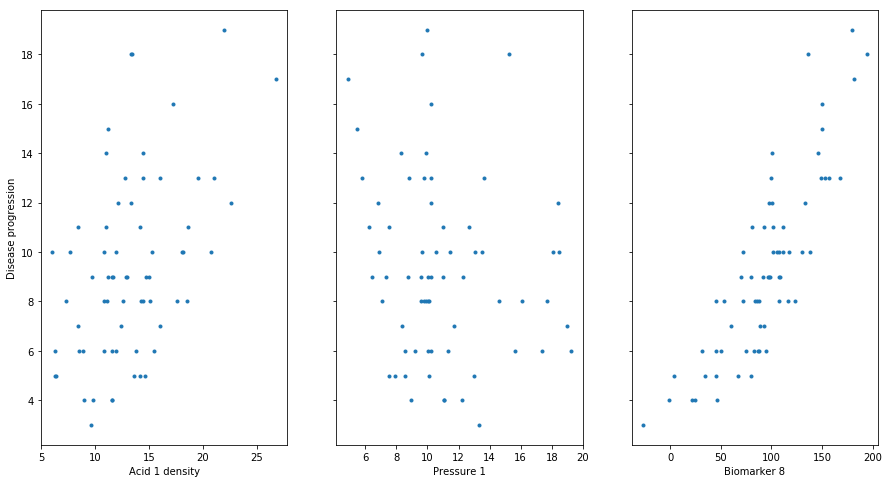

In [224]:
f, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15,8))

Col0=listColNames.index("Acid 1 density")
ax[0].plot(X[:,Col0],Y[:],'.')
ax[0].set_xlabel(listColNames[Col0])
ax[0].set_ylabel('Disease progression')

Col2=listColNames.index("Biomarker 8")
ax[2].plot(X[:,Col2],Y[:],'.')
ax[2].set_xlabel(listColNames[Col2])

Col1=listColNames.index("Pressure 1")
ax[1].plot(X[:,Col1],Y[:],'.')
ax[1].set_xlabel(listColNames[Col1])

Sur la représentation de Disease Progression en fonction de biomarker 8, on observe que les points s'agencent plus finement autour d'une droite => la prédiction et la réalité auraient surement été plus corrélées lors d'une prédiction.

Ça n'aurait pas été le cas en prédisant Disease Progression à l'aide de la variable Pressure 1 : Les points forment un nuage sur le graphe => les variables ne semblent pas être corrélées. 

In [225]:
ColNb_X_P1 = listColNames.index('Pressure 1')

X_P1 = XY[:,ColNb_X_P1]

In [227]:
n_splits = 4
kf = KFold(n_splits=n_splits)

r2_score_mean1 = 0
coef_a = 0
coef_b = 0
    
for train, test in kf.split(X_P1):
    X_train = X_P1[train].reshape(-1, 1)
    X_test = X_P1[test].reshape(-1, 1)
            
    y_train = Y[train]
    y_test = Y[test]
        
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    r2_score_mean1 += r2_score(y_test, y_pred) 
    coef_a += lr.coef_[0,0]
    coef_b += lr.intercept_[0]
        
r2_score_fin1 = r2_score_mean1 / n_splits
a_X_P1 = coef_a / n_splits
b_X_P1 = coef_b / n_splits
    
print("A l'aide d'une méthode de validation croisée, on a : R² = ", 
      np.round(r2_score_fin1,3))

A l'aide d'une méthode de validation croisée, on a : R² =  -0.083


In [228]:
ColNb_X8 = listColNames.index('Biomarker 8')

X8 = XY[:,ColNb_X8]

In [230]:
n_splits = 4
kf = KFold(n_splits=n_splits)

r2_score_mean1 = 0
coef_a = 0
coef_b = 0
    
for train, test in kf.split(X8):
    X_train = X8[train].reshape(-1, 1)
    X_test = X8[test].reshape(-1, 1)
            
    y_train = Y[train]
    y_test = Y[test]
        
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    r2_score_mean1 += r2_score(y_test, y_pred) 
    coef_a += lr.coef_[0,0]
    coef_b += lr.intercept_[0]
        
r2_score_fin1 = r2_score_mean1 / n_splits
a_X8 = coef_a / n_splits
b_X8 = coef_b / n_splits
    
print("A l'aide d'une méthode de validation croisée, on a : R² = ", 
      np.round(r2_score_fin1,3))

A l'aide d'une méthode de validation croisée, on a : R² =  0.68


    Conclusion : On obtient en effet un coefficient de corrélation plus proche de 1 pour Biomarker 8, et un coefficient, négatif comme le suggère l'allure du nuage de points sur la représentation graphique, plus proche de 0 pour Pressure 1.

### QUESTION 2.4 
Peut-on enfin dire si on observe une relation significative entre 'Disease progression' et (independament) 'Acid 1 density' ou 'Biomarker 8' ou 'Pressure 1'. On peut le valider en testant si les coefficients des pentes obtenues entre 'Disease progression' et chacune de ses trois variables par regression lineaire simples sont significativement differentes de 0.

Text(0.5,0,'Biomarker 8')

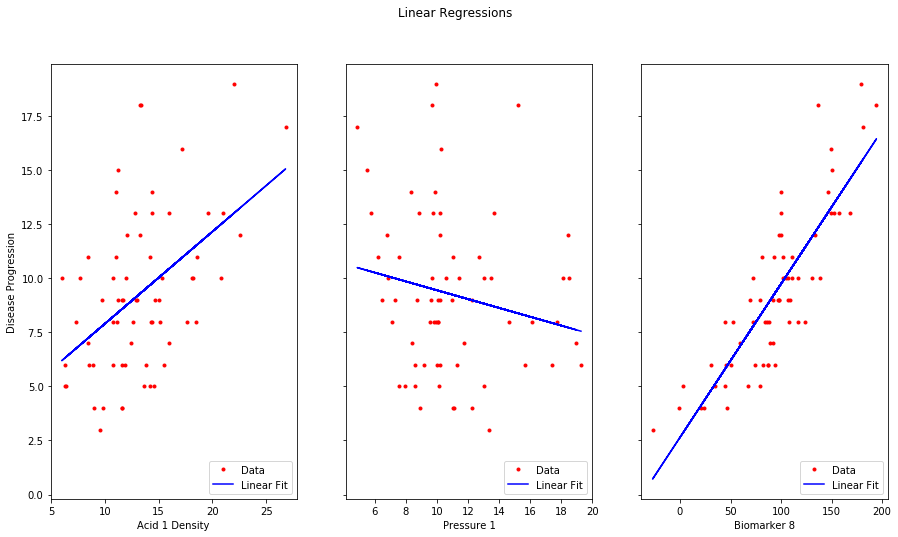

In [15]:
f, ax = plt.subplots(1, 3, sharey=True, figsize=(15,8))
f.suptitle("Linear Regressions")

ax[0].plot(X1, Y, 'r.')
ax[0].plot(X1, a_X1 * X1 + b_X1, 'b-')
ax[0].legend(('Data', 'Linear Fit'), loc='lower right')
ax[0].set_xlabel('Acid 1 Density')
ax[0].set_ylabel('Disease Progression')

ax[1].plot(X_P1, Y, 'r.')
ax[1].plot(X_P1, a_X_P1 * X_P1 + b_X_P1, 'b-')
ax[1].legend(('Data', 'Linear Fit'), loc='lower right')
ax[1].set_xlabel('Pressure 1')

ax[2].plot(X8, Y, 'r.')
ax[2].plot(X8, a_X8 * X8 + b_X8, 'b-')
ax[2].legend(('Data', 'Linear Fit'), loc='lower right')
ax[2].set_xlabel('Biomarker 8')

In [16]:
print("Acid 1 density : Y = ", round(b_X1,2), ' + ', round(a_X1,2), '*X')
print("Pressure 1 : Y = ", round(b_X_P1,2), ' + ', round(a_X_P1,2), '*X')
print("Biomarker 8 : Y = ", round(b_X8,2), ' + ', round(a_X8,2), '*X')

Acid 1 density : Y =  3.63  +  0.43 *X
Pressure 1 : Y =  11.49  +  -0.2 *X
Biomarker 8 : Y =  2.64  +  0.07 *X


    On peut exprimer la prédiction comme suit : Ŷ = b0 + b1 . x

    Si b1 est significativement différent de 0, on peut considérer qu'il existe une relation de dépendance entre les xi et les Yi.

In [232]:
X2 = sm.add_constant(X1)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())
print("\nP value : ", np.round(est2.f_pvalue,5))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     18.85
Date:                Sun, 14 Oct 2018   Prob (F-statistic):           5.13e-05
Time:                        17:25:57   Log-Likelihood:                -171.19
No. Observations:                  66   AIC:                             346.4
Df Residuals:                      64   BIC:                             350.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7186      1.345      2.765      0.0

In [233]:
X2 = sm.add_constant(X_P1)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())
print("\nP value : ", np.round(est2.f_pvalue,5))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.010
Date:                Sun, 14 Oct 2018   Prob (F-statistic):              0.161
Time:                        17:26:14   Log-Likelihood:                -178.69
No. Observations:                  66   AIC:                             361.4
Df Residuals:                      64   BIC:                             365.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3158      1.500      7.541      0.0

In [234]:
X2 = sm.add_constant(X8)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())
print("\nP value : ", np.round(est2.f_pvalue,5))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     162.5
Date:                Sun, 14 Oct 2018   Prob (F-statistic):           3.16e-19
Time:                        17:26:21   Log-Likelihood:                -137.99
No. Observations:                  66   AIC:                             280.0
Df Residuals:                      64   BIC:                             284.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6513      0.575      4.609      0.0

    Pour Acid 1 density et Biomarker 8, on observe que p value < alpha (car il est inférieur à 0.0005 - affiché à 0.000 dans les tableaux de résultats ci-dessus, avec les arrondis). On peut donc rejeter l'hypothèse que b1 est égal à 0, et donc affirmer que ces deux variables sont corrélées avec Disease Progression. 
    
    Or, on ne peut rejeter cette hypothèse pour Pressure 1 (p value = 0.161 > alpha) ; on ne peut rejeter l'hypothèse que les variables ne sont pas corrélées. 

## QUESTION 3
On s'interesse maintenant au lien entre la variable 'Disease progression' et 'Biomarker 5'. On peut remarquer que ces donnees contiennent deux valeurs aberrantes.

### Question 3.1
Quelles sont les valeurs aberrantes et quel va etre leur impact lors de l'estimation d'une relation lineaire entre ces deux variables ?

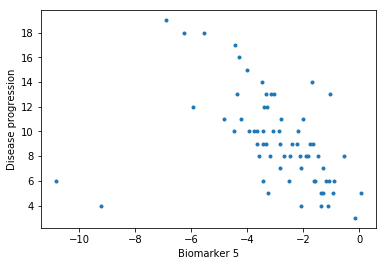

In [235]:
B_5 = listColNames.index('Biomarker 5')

X_5 = XY[:,B_5]

plt.plot(X[:,B_5],Y[:],'.')
plt.xlabel('Biomarker 5')
plt.ylabel('Disease progression')
plt.show()

    On observe un nuage de point qui semble dispersé linéairement, ce qui laisse penser que Disease progression est peut-être corrélé avec Biomarker 5. Deux points, proches de l'origine, en sont éloignées et apparaissent donc comme des valeurs aberrantes. On risque d'avoir une moins bonne corrélation entre les variables si on les garde, que si on les retire du jeu de données.

### QUESTION 3.2 : 
Definissez une procedure de detection automatique de ces variables basee sur la distance de Cook.

In [236]:
n = len(X_5)
cook_dist = []

lr.fit(X_5[:, np.newaxis], Y)  
s2 = np.sum((Y - lr.predict(X_5[:, np.newaxis])) * (Y - lr.predict(X_5[:, np.newaxis]))) / (n - 2)

for i in range(n):
    x_del_i = np.delete(X_5, i)
    y_del_i = np.delete(Y, i) 

    lr.fit(x_del_i[:, np.newaxis], y_del_i)
    sum_squared_error = np.sum((Y - lr.predict(X_5[:, np.newaxis])) * (Y - lr.predict(X_5[:, np.newaxis])))

    cook_dist.append(sum_squared_error / (2. * s2))

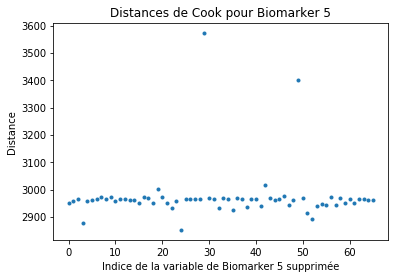

In [237]:
plt.plot(cook_dist, '.')
plt.title("Distances de Cook pour Biomarker 5")
plt.xlabel("Indice de la variable de Biomarker 5 supprimée")
plt.ylabel("Distance")
plt.show()

    Les deux points qui se détachent de la ligne sont les valeurs aberrantes dont on parlait précédemment. On peut les détecter automatiquement en vérifiant si elles appartiennent à un certain intervalle, avec un seuil de détection égal à la moyenne plus ou moins deux fois l'écart-type. 

In [238]:
# On calcule la moyenne et les écarts types des distances de Cook précédemment 
# calculés

c_mean = np.mean(cook_dist)
c_std = np.std(cook_dist)

detection = c_mean + 2 * c_std

for i, x in enumerate(cook_dist):
    if (x - detection) > 0:
        print("Point aberrant détecté en (X,Y) = (" + str(np.round(X_5[i],1)) + \
              "," + str(np.round(Y[i][0],1)) + ")")

Point aberrant détecté en (X,Y) = (-10.8,6.0)
Point aberrant détecté en (X,Y) = (-9.2,4.0)


### QUESTION 3.3 : 
Pourriez vous plus simplement détecter ces observations aberrantes à l'aide des résidus ? 
Si oui, décrivez comment, sans nécessairement coder la solution.

    Les observations aberrantes sont celles ayant les résidus les plus importants ; on va utiliser le même raisonnement que précédemment pour les détecter, avec un seuil de détection égal à la moyenne plus ou moins deux fois l'écart-type. 

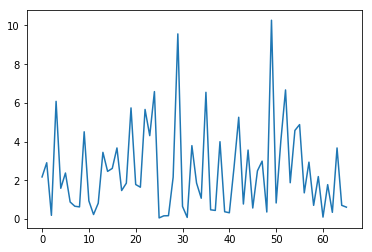

In [239]:
lr = LinearRegression()
lr.fit(X_5[:, np.newaxis], Y) 

residus = abs((Y - lr.predict(X_5[:, np.newaxis]))[:,0])

plt.plot(residus)
plt.show()

In [240]:
c_mean = np.mean(residus)
c_std = np.std(residus)

detection = c_mean + 2 * c_std

for i, x in enumerate(residus):
    if (x - detection) > 0:
        print("Point aberrant détecté en (X,Y) = (" + str(np.round(X_5[i],1)) + \
              "," + str(np.round(Y[i][0],1)) + ")")

Point aberrant détecté en (X,Y) = (-10.8,6.0)
Point aberrant détecté en (X,Y) = (-9.2,4.0)


### QUESTION 3.4 : 
Comment traiteriez-vous les donnees aberrantes dans le contexte de la regression lineaire entre 'Disease progression' et 'Biomarker 5' pour estimer un lien pertinent entre ces deux variables

    Afin d'établir une régression linéaire "fiable" entre 'Disease progression' et 'Biomarker 5', je supprimerais les données aberrantes du jeu de données d'entrainement / d'apprentissage ; cela permet d'améliorer les coefficient de corrélation, et ça aura pour effet d'améliorer la prédiction pour des nouvelles valeurs de 'Biomarker 5'.

In [241]:
new_X5 = copy.deepcopy(X_5)
new_X = copy.deepcopy(X)
new_Y = copy.deepcopy(Y)

# compte le décalage engendré par la suppression d'une variable dans 
# new_X, new_X5 et de new_Y par rapport aux vecteurs initiaux
j = 0

for i, x in enumerate(residus):
    if (x - detection) > 0:
        del_X = np.zeros((new_X.shape[0] - 1, new_X.shape[1]))
        
        for Col in range(len(listColNames)):
            del_X[:,Col] = np.delete(new_X[:,Col], i - j)
        
        new_X = del_X
        
        del_X5 = np.delete(new_X5, i - j)
        new_X5 = del_X5
        
        del_y = np.delete(new_Y, i - j)
        new_Y = del_y
        
        j += 1

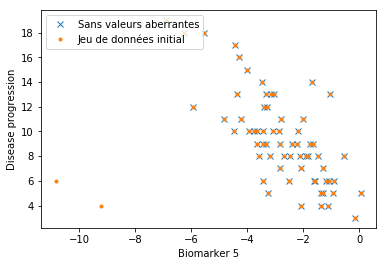

In [242]:
plt.plot(new_X5, new_Y[:],'x', label="Sans valeurs aberrantes")
plt.plot(X_5, Y[:],'.', label="Jeu de données initial")

plt.xlabel('Biomarker 5')
plt.ylabel('Disease progression')
plt.legend(loc=2)
plt.show()

## QUESTION 4 :
Une fois les observations aberrantes de 'Biomarker 5' traitees, on souhaite sélectionner les variables de 'X' qui permettent de prédire au mieux 'Disease progression' a l'aide de la regression multiple regularisee.
### QUESTION 4.1 :
Expliquez pourquoi vous effecturez cette procedure sur 'X_scaled' plutot que 'X' ?



    Si on utilise un jeu de données qui n'est pas homogène, on va laisser influer la variance de certaines variables dans le résultat en leur donnant plus d'importance. 

In [244]:
X_scaled = preprocessing.scale(new_X)

### QUESTION 4.2 : 
Expliquez pourquoi vous regulariserez les coefficients estimes avec une regularisation de type LASSO plutot que RIDGE ?

    Notre objectif dans cette partie est de sélectionner les variables de X qui permettront de prédire au mieux Y. Si la régression Ridge combine les effets de variables explicatrices très corrélées pour les renforcer mutuellement, la régression LASSO permet quant à elle d'estimer à 0 les effets peu importants et donc de sélectionner un modèle ayant un nombre de variables inférieur à p. 

### QUESTION 4.3 : 
Codez la procédure de sélection des variables optimales en parametrant à la main le poids entre la qualité de prédiction et le niveau de régularisation

In [276]:
kf = KFold(n_splits=8)

maxi = [0,0,0,0]

for alpha in np.arange(0.1, 0.5, 0.005):
    r2_score_lasso_list = []
    
    for train, test in kf.split(X_scaled):
        X_train = X_scaled[train]
        y_train = new_Y[train]
        X_test = X_scaled[test]
        y_test = new_Y[test]

        lasso_regressor = Lasso(alpha=alpha)
        lasso_regressor.fit(X_train, y_train)

        y_pred_lasso = lasso_regressor.predict(X_test)
        r2_score_lasso = r2_score(y_test, y_pred_lasso)
        
        r2_score_lasso_list.append(r2_score_lasso)
        
    if np.sum(r2_score_lasso_list) > maxi[1]: 
        maxi[0] = alpha
        maxi[1] = np.sum(r2_score_lasso_list)
        maxi[2] = r2_score_lasso_list
        maxi[3] = lasso_regressor.coef_
        
print("Meilleur compromis : \n-alpha = ", np.round(maxi[0],3),
      "\n-total R² : ",np.round(maxi[1],3))

print("\nCoefficient : R² = "+ \
      str(round(np.mean(r2_score_lasso_list),2)))
print("\nCoefficient de la régression LASSO : \n\n", maxi[3])

var = []
for i, val in enumerate(maxi[3]):
    if abs(val) > 0.01:
        var.append(listColNames[i])
print("Variables optimales : ", var)

Meilleur compromis : 
-alpha =  0.325 
-total R² :  6.068

Coefficient : R² = 0.75

Coefficient de la régression LASSO : 

 [ 0.1574595  -0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.          0.          0.         -1.1661198
  0.         -0.          0.          2.09983553 -0.         -0.        ]
Variables optimales :  ['Acid 1 density', 'Biomarker 5', 'Biomarker 8']


    Le meilleur poids entre la qualité de prédiction et le niveau de régularisation est obtenu avec le coefficient alpha ci-dessus.
    

### QUESTION 4.4 : 
Codez la procedure automatique de parametrisation de ce poids, de sorte à ce qu'un maximum de trois variables soit typiquement sélectionné et que la qualité de prédiction soit optimale.
Une procédure de validation croisée de type leave-one-out sera idéalement utilisée.
La sélection des variables est-elle stable ?



In [280]:
Loo = LeaveOneOut()

#On définit le seuil à partir duquel on ne considère plus la variable
epsilon = 0.001
mini = [0,220,0]

for alpha in np.arange(0.26, 0.30, 0.0001):
    sum_squared_scores = 0.
    
    for train, test in Loo.split(X_scaled):
        lasso_regressor = Lasso(alpha=alpha, fit_intercept=True)
        lasso_regressor.fit(X_scaled[train], new_Y[train])
  
        y_pred_lasso = lasso_regressor.predict(X_scaled[test])
        sum_squared_scores += (new_Y[test][0]- y_pred_lasso[0]) * \
        (new_Y[test][0] - y_pred_lasso[0])
        
    if sum_squared_scores < mini[1]: 
        if np.sum(lasso_regressor.coef_>epsilon) <= 3:
            mini[0] = alpha
            mini[1] = sum_squared_scores
            mini[2] = lasso_regressor.coef_
            #print(mini[2] > epsilon)
    
print("Minimum d'erreur avec 3 variables sélectionnées ",
      "au maximum :\n- pour alpha = ", np.round(mini[0],4), 
      "\n- total d'erreur = ",
      mini[1], " \n- nb coef sélectionnés = ",
      np.sum(abs(mini[2]) > epsilon))

var = []
for i, val in enumerate(mini[2]):
    if abs(val) > epsilon:
        var.append(listColNames[i])
print("Variables optimales : ", var)

Minimum d'erreur avec 3 variables sélectionnées  au maximum :
- pour alpha =  0.2795 
- total d'erreur =  191.87851867773344  
- nb coef sélectionnés =  3
Variables optimales :  ['Acid 1 density', 'Biomarker 5', 'Biomarker 8']


    La qualité de prédiction est optimale lorsque la somme des carrés des erreurs est minimale. On a ainsi sélectionné la somme d'erreurs minimale pour un maximum de 3 variables sélectionnées.
    Ici, on trouve le minimum pour alpha = 0.2795 : on sélectionne ainsi 2 variables. La première, la douxième et la seizième variable sont régulièrement sélectionnées ; on peut donc dire que la sélection des variables est stable. 

## QUESTION 5 :
On s'interesse enfin au fichier 'MedicalData2.csv' et non 'MedicalData1.csv' qui contient une colonne qualitative supplementaire 'Pathology type'.
### QUESTION 5.1 : 
Quelles sont les differences entre les structures du fichier 'MedicalData2.csv' et du fichier 'MedicalData1.csv' en plus de cette colonne supplementaire

In [281]:
dataframe2 = pandas.read_csv("./MedicalData2.csv",sep=',',
                             decimal=b'.')
dataframe2.head()

,Acid 1 density,Acid 2 density,Acid 3 density,Cells 1 density,Cells 2 density,Pressure 1,Pressure 2,Bio-marker 1,Bio-marker 2,Biomarker 3,Biomarker 4,Biomarker 5,Biomarker 6,Biomarker 6.1,Biomarker 7,Biomarker 8,Biomarker 9,Biomarker 10,Disease progression,Pathology type
0,11.6,6.4,4.3,7.2,14.4,19.26,39.32,50.00,13.040000,0.20,0.0440,-1.578984,2.209,9.02,0.26,94.285053,3.56,16.91,6,2
1,15.5,10.5,4.9,6.9,13.7,8.57,36.78,22.57,18.713333,0.51,0.8501,-2.497499,0.339,22.43,0.10,86.766527,7.06,-3.47,6,2
2,15.3,6.5,4.2,6.4,13.6,13.48,25.90,8.25,8.246667,0.27,0.9629,-3.638758,0.339,17.94,0.13,107.336147,3.20,10.05,10,2
3,13.4,7.7,4.1,5.8,14.2,15.23,44.36,11.09,11.093333,0.67,-0.2756,-6.273760,1.611,11.38,0.20,136.516384,4.33,-3.62,18,2
4,16.0,5.2,3.2,5.7,12.8,8.37,19.62,7.44,6.386667,0.24,-0.6928,-2.096575,0.659,8.56,0.27,88.774469,4.57,1.56,7,2


In [283]:
for col in list(dataframe2.columns):
    if col in list(dataframe.columns):
        comp = [np.round(a1,3) == np.round(a2,3) for a1, a2 in \
                zip(dataframe[col].values, dataframe2[col].values)]
        if np.sum(comp) != len(dataframe):
            print("Les valeurs sont différentes dans la colonne ", 
                  col)
    else:
        print(col, "n'est pas dans le fichier 'MedicalData1.csv'")

Pathology type n'est pas dans le fichier 'MedicalData1.csv'


    Dans le fichier "MedicalData.csv", le séparateur est un point virgule et le séparateur déimal est une virgule. Dans "MedicalData2.csv", le séparateur est une virgule et le séparateur décimal est un point. Les colonnes sont les mêmes, leurs valeurs aussi, à ceci près que le deuxième fichier contient une colonne supplémentaire : 'Pathology type'. Cette variable est une variable qualitative.

### QUESTION 5.2 : 
Est-ce qu'une variable semble bien expliquer la classe de 'Pathology type'. Quelle démarche vous semble la plus pertinente pour identifer cette variable ?`



Beta values
-> Acid 1 density: -0.1914443769908638
-> Acid 2 density: 0.398943979340164
-> Acid 3 density: 0.0025435852890589965
-> Cells 1 density: 0.35882118045477374
-> Cells 2 density: 2.8793996956404655
-> Pressure 1: 0.06661415844647828
-> Pressure 2: -0.25520675788350705
-> Bio-marker 1: -0.01670511756047511
-> Bio-marker 2: -0.061505549011450555
-> Biomarker 3: -0.28016257894525304
-> Biomarker 4: -0.13513806737285777
-> Biomarker 5: 0.5232221393140347
-> Biomarker 6: 0.30617456682155214
-> Biomarker 6.1: -0.12316823140995975
-> Biomarker 7: -0.021325029498656757
-> Biomarker 8: 0.19035692866497123
-> Biomarker 9: 0.7727170908422861
-> Biomarker 10: -0.35663405041094454
-> Disease progression: -0.2586801610514386


Variable ayant le plus d'influance sur la variable qualitative :


/home/mergy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


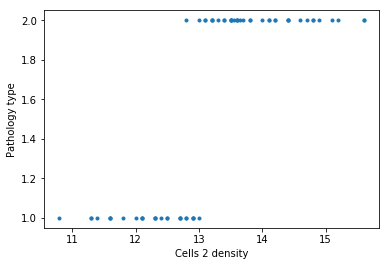

In [202]:
listColNames=list(dataframe2.columns)

XY_bis = dataframe2.values
ColNb_Y_bis = listColNames.index('Pathology type')

listColNames.pop(ColNb_Y_bis)

Y_bis = XY_bis[:,ColNb_Y_bis]
X_bis = np.delete(XY_bis, ColNb_Y_bis, 1)

X_scaled_bis = preprocessing.scale(X_bis)

log_reg = LogisticRegression()
log_reg.fit(X=X_scaled_bis, y=Y_bis)

# on initialise le coefficient maximum à 0
maxi = 0

print('Beta values')
for Col in range(len(listColNames)):
    print('-> '+listColNames[Col]+': '+ str(log_reg.coef_[0,Col])) 
    if log_reg.coef_[0,Col] > maxi:
        maxi = log_reg.coef_[0,Col]
        col_infl = Col

print("\n\nVariable ayant le plus d'influance sur la variable qualitative :")
plt.plot(X_bis[:,col_infl],Y_bis[:],'.', 
         label=listColNames[col_infl])
plt.xlabel(listColNames[col_infl])
plt.ylabel('Pathology type')

plt.show()



    La variable la plus à même de permettre d'identifier le type de pathologie est la densité cellulaire 2. En effet, c'est celle dont la dispersion varie le plus selon que la pathologie soit de type 1 ou de type 2, comme on peut l'observer sur le graphe ci-dessus.